## First Notebook 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
df = pd.read_csv("data/chocolate.csv") 

In [3]:
df_copy = df.copy()

In [4]:
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50


In [5]:
df['Rating_class']=[1 if s>= 3.00 else 0 for s in df['Rating']]

In [6]:
df['Rating_class']==1

0        True
1        True
2        True
3        True
4        True
        ...  
2357    False
2358     True
2359     True
2360     True
2361     True
Name: Rating_class, Length: 2362, dtype: bool

In [7]:
df['Rating_class'].value_counts()

1    1815
0     547
Name: Rating_class, dtype: int64

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2362 non-null   int64  
 1   Company (Manufacturer)            2362 non-null   object 
 2   Company Location                  2362 non-null   object 
 3   Review Date                       2362 non-null   int64  
 4   Country of Bean Origin            2362 non-null   object 
 5   Specific Bean Origin or Bar Name  2362 non-null   object 
 6   Cocoa Percent                     2362 non-null   object 
 7   Ingredients                       2274 non-null   object 
 8   Most Memorable Characteristics    2362 non-null   object 
 9   Rating                            2362 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 184.7+ KB


In [9]:
df_copy.describe()

,REF,Review Date,Rating
count,2362.000000,2362.000000,2362.000000
mean,1343.279848,2013.894581,3.187384
std,709.468334,3.667615,0.450292
min,5.000000,2006.000000,1.000000
25%,754.000000,2011.000000,3.000000
50%,1377.000000,2014.000000,3.250000
75%,1948.000000,2017.000000,3.500000
max,2542.000000,2021.000000,4.000000


In [10]:
df_copy.corr()

,REF,Review Date,Rating
REF,1.000000,0.992096,0.092580
Review Date,0.992096,1.000000,0.095099
Rating,0.092580,0.095099,1.000000


In [66]:
char=Counter(" ".join(df["Most Memorable Characteristics"]).split()).most_common(20)

In [67]:
df["Rating"].value_counts()

3.50    512
3.00    498
3.25    421
2.75    319
3.75    280
2.50    160
4.00    104
2.00     33
2.25     17
1.50     10
1.00      4
1.75      3
2.60      1
Name: Rating, dtype: int64

In [13]:
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Rating_class
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75,1
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50,1
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25,1
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75,1
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50,1
...,...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,0
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75,1
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50,1
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,1


In [14]:
df_dropped = df.drop(['Review Date', 'REF'],axis=1)

In [15]:
df_dropped

,Company (Manufacturer),Company Location,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Rating_class
0,5150,U.S.A.,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75,1
1,5150,U.S.A.,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50,1
2,5150,U.S.A.,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25,1
3,A. Morin,France,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75,1
4,A. Morin,France,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50,1
...,...,...,...,...,...,...,...,...,...
2357,Zotter,Austria,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,0
2358,Zotter,Austria,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75,1
2359,Zotter,Austria,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50,1
2360,Zotter,Austria,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,1


In [16]:
df= df_copy.dropna()

In [68]:
char

[('sweet,', 213),
 ('cocoa', 199),
 ('mild', 198),
 ('creamy,', 174),
 ('nutty,', 163),
 ('cocoa,', 157),
 ('sandy,', 154),
 ('fruit,', 140),
 ('sour', 127),
 ('fatty,', 123),
 ('roasty,', 117),
 ('intense,', 112),
 ('floral,', 108),
 ('earthy,', 105),
 ('spicy,', 103),
 ('rich', 97),
 ('nutty', 97),
 ('fruit', 96),
 ('off', 94),
 ('roasty', 93)]

1. Loop over `char`
2. Collect the name of the characteristic
3. Filter the dataframe for all rows where the characteristic is found
    * (You can use `df[df.column.contains(characteristic)]`
4. Calculate the average rating for the filtered dataframe
5. Store the average

In [69]:
Characters_ratings={}
for characteristic in char:
    c = characteristic[0]
    avg_rating = df[df['Most Memorable Characteristics'].str.contains(c)]['Rating'].mean()
    Characters_ratings[c] = avg_rating

In [70]:
Characters_ratings

{'sweet,': 3.0280269058295963,
 'cocoa': 3.369565217391304,
 'mild': 3.2620772946859904,
 'creamy,': 3.475988700564972,
 'nutty,': 3.289877300613497,
 'cocoa,': 3.3659638554216866,
 'sandy,': 3.091194968553459,
 'fruit,': 3.2585616438356166,
 'sour': 3.009259259259259,
 'fatty,': 3.0694444444444446,
 'roasty,': 3.1395833333333334,
 'intense,': 3.1826086956521737,
 'floral,': 3.2261261261261263,
 'earthy,': 3.053738317757009,
 'spicy,': 3.323809523809524,
 'rich': 3.465034965034965,
 'nutty': 3.289272030651341,
 'fruit': 3.296979865771812,
 'off': 2.954656862745098,
 'roasty': 3.197429906542056}

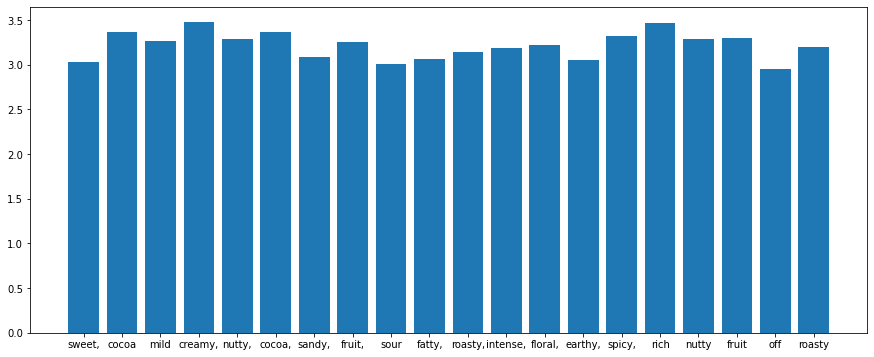

In [78]:
plt.figure(figsize=(15,6))
plt.bar(*zip(*Characters_ratings.items()))
plt.show()

In [34]:
df = df_copy.replace('%', ' ', regex=True)

In [36]:
df['Cocoa Percent'] = df['Cocoa Percent'].astype(float)

In [37]:
df_copy.drop(['Most Memorable Characteristics'], axis=1)

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L",3.50
...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C",3.25


In [43]:
y = df['Rating']
X = df.drop('Rating', axis=1)

In [44]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.15, random_state=2021)

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.15, random_state=2021)

In [46]:
num_cols = list(X.select_dtypes('number').columns)
num_cols

['REF', 'Review Date', 'Cocoa Percent']

In [47]:
cat_cols = list(X.select_dtypes('object').columns)
cat_cols

['Company (Manufacturer)',
 'Company Location',
 'Country of Bean Origin',
 'Specific Bean Origin or Bar Name',
 'Ingredients',
 'Most Memorable Characteristics']

In [48]:
scaler = StandardScaler()

In [49]:
scaler.fit(X_train[num_cols])

StandardScaler()

In [50]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=num_cols)

In [51]:
df['Ingredients'].value_counts()

3- B,S,C          903
2- B,S            661
4- B,S,C,L        273
5- B,S,C,V,L      184
4- B,S,C,V        139
2- B,S*            31
4- B,S*,C,Sa       20
3- B,S*,C          12
3- B,S,L            8
4- B,S*,C,V         7
5-B,S,C,V,Sa        6
1- B                5
4- B,S,C,Sa         5
4- B,S,V,L          5
6-B,S,C,V,L,Sa      4
4- B,S*,V,L         3
3- B,S,V            3
4- B,S*,C,L         2
3- B,S*,Sa          1
5- B,S,C,L,Sa       1
2- B,C              1
Name: Ingredients, dtype: int64

In [52]:
df['Ingredients'].value_counts().head(8)

3- B,S,C        903
2- B,S          661
4- B,S,C,L      273
5- B,S,C,V,L    184
4- B,S,C,V      139
2- B,S*          31
4- B,S*,C,Sa     20
3- B,S*,C        12
Name: Ingredients, dtype: int64

In [53]:
X_cat = df[['Most Memorable Characteristics','Ingredients']]

In [72]:
cat_cols = list(X.select_dtypes('object').columns)
cat_cols

['Company (Manufacturer)',
 'Company Location',
 'Country of Bean Origin',
 'Specific Bean Origin or Bar Name',
 'Ingredients',
 'Most Memorable Characteristics']

In [55]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [73]:
ohe.fit(X_train[cat_cols])

ValueError: Input contains NaN

In [62]:
X_train_encoded = ohe.transform(X_train[[cat_cols]])
X_val_encoded = ohe.transform(X_val[[cat_cols]])

KeyError: "None of [Index([('Company (Manufacturer)', 'Company Location', 'Country of Bean Origin', 'Specific Bean Origin or Bar Name', 'Ingredients', 'Most Memorable Characteristics')], dtype='object')] are in the [columns]"

In [58]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names())
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=ohe.get_feature_names())

In [61]:
X_val_encoded_df

,"x0_Easter candy, burnt","x0_XL nibs, sour, cardboard","x0_accesible, simple cocoa note","x0_accessible, sweet, sandy","x0_acidic, astringent, spicy","x0_acidic, bitter, dry","x0_acidic, cocoa, dried fruit","x0_acidic, mildly burnt, metallic","x0_acidic, sour, cocoa","x0_acidic, sweet, cucumber",...,"x0_woody, grassy, spicy","x0_woody, lemon, mild bitter","x0_woody, meaty, vegetal","x0_woody, mocha, molasses","x0_woody, nutty, off sour note","x0_woody, nutty, short","x0_woody, red berry, sour","x0_woody, red fruit, sour","x0_woody, sweet, unrefined","x0_woody, toast, pepper"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['Most Memorable Characteristics'].value_counts()

In [ ]:
c = df['Most Memorable Characteristics'].map(lambda x: x.split(','))

In [ ]:
df

In [ ]:
df['Ingredients'].value_counts()